# 04 - Graphical Causal Models


## Thinking About Causality

요리사들이 유튜브에서 음식을 묘사하는 것을 보신 적이 있나요? "소스가 벨벳처럼 될 때까지 졸이세요." 요리를 배우기 시작했다면 의미를 모를 겁니다. 인과관계도 마찬가지입니다. 술집에서 사람들이 인과관계를 주제로 토론하는 것을 들었다고 해봅시다. (아마 경제학과 옆 술집일 거예요.) 어떻게 소득의 교란이 이민에 대한 효과를 확인하는 것을 어렵게 만들었는지를 말할 것입니다. 그들은 도구 변수를 사용해야 한다고 합니다. 아마 무슨 말인지 모를 거에요. 문제를 조금 해결해 봅시다.

`Graphical models`(그래픽 모델)은 인과관계 언어입니다. 그래픽 모델은 다른 용감하고 진정한 인과관계 애호가들과 이야기할 때 사용하기도 합니다. 또한, 여러분의 생각을 분명하게 만들어 줍니다.

`potential outcome`(잠재적 결과)의 조건부 독립성을 살펴보겠습니다. 인과추론에서 참으로 가정하는 것 중 하나입니다.

$
(Y_0, Y_1) \perp T | X
$

조건부 독립성은 숨어 있는 변수 외에 `treatment` 만의 영향을 측정할 수 있게 해줍니다. 가장 흔한 예는 환자에 미치는 약의 영향입니다. 매우 아픈 환자들만 약을 받는다면, 약을 주는 행위가 환자를 아프게 하는 것처럼 보일 수 있습니다. 병의 중증도가 약의 효과와 섞여 있기 때문입니다. 환자를 중증 환자와 아닌 환자로 나누고 각 그룹에 대해 약의 영향을 분석한다면, 실제 효과에 대한 더 명확한 결과를 얻을 수 있습니다. `feature`에 따라 모집단을 나누는 과정은 $X$에 대한 제어 또는 조건화라 부릅니다. 병의 중한 정도를 조건화함으로써 처치 메커니즘은 무작위만큼 좋아집니다. 중증 그룹 내 환자끼리는 같다고 생각할 수 있으므로 병의 중증도가 아닌 우연에 의해서만 약을 받을 수도 있고 그렇지 않을 수도 있습니다. 그룹 내에서 `treatment`가 무작위로 할당된다면 `treatment`는 `potential outcome`과 조건부 독립입니다.

독립과 조건부 독립은 인과추론의 핵심입니다. 이를 고려하는 것은 꽤 어려운 일이지만 올바른 언어를 사용한다면 작업이 쉬워집니다. **인과 그래픽 모델**은 인과관계가 작동하는 방법을 표기하는 올바른 언어입니다.

그래픽 모델은 다음과 같습니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

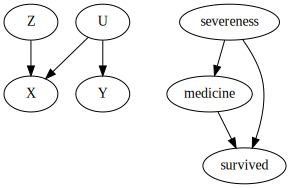

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

각 노드는 `random variable`(확률 변수)입니다. 화살표 또는 모서리로 한 변수가 다른 변수를 유발하는지 표시합니다. 위의 첫 번째 그래픽 모델은 `Z`가 `X`를 유발하고 `U`가 `X`와 `Y`를 유발하는 상황을 나타냅니다. 두 번째 그래프는 약이 환자의 생존에 미치는 영향에 대해 나타낸 것입니다. 중증(severeness)은 약(medicine)과 생존(survived) 모두를 유발하며, 약은 생존을 유발합니다. 이처럼 그래픽 모델은 일이 발생하는 경로를 명확하게 해주므로 생각을 정리하는데 도움을 줍니다.

## Crash Course in Graphical Models

그래픽 모델은 [한 학기](https://www.coursera.org/specializations/probabilistic-graphical-models)를 할애할 만큼 깊은 주제입니다. 그러나 우리 목적은 그래픽 모델이 독립성을 어떻게 나타내는지, 어떤 조건부 독립성을 가정하는지 이해하는 것입니다. 독립성은 강을 따라 흐르는 물과 같이 그래픽 모델을 통해 흐릅니다. 변수를 처리하는 방법에 따라 흐름을 멈출 수도 있습니다. 몇 가지 일반적인 그래픽 구조와 예시를 살펴보겠습니다. 단순한 예지만 그래픽 모델에서 독립성과 조건부 독립성에 대한 모든 것을 이해하기에 충분합니다.

아래 간단한 그래프를 보세요. `A`는 `B`를, `B`는 `C`를 유발합니다. 또는 `X`는 `Y`를, `Y`는 `Z`를 유발합니다.

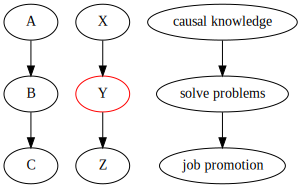

In [3]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

첫 번째 그래프에서 종속성(dependence, 독립성의 반대말)은 화살표의 방향을 따라 흐릅니다. 특히 **종속성은 대칭구조**라는 점을 기억하세요. 덜 직관적인 표현이지만요.(대칭구조: 순서와 무관한 관계. ex. 형제/자매 관계는 대칭이지만, 조상/자손의 관계는 대칭관계가 아님.). 좀 더 구체적인 예를 들어보이겠습니다. 다음과 같이 가정하겠습니다. 인과 추론 지식을 아는 것이 비즈니스 문제를 푸는 유일한 방법이며, 그 문제를 해결하는 것이 승진하는 유일한 방법이라고 합시다. 그러면 인과 추론 지식은 승진과 직결되는 비즈니스 문제 해결과 같은 의미를 갖습니다. 이때 **승진은 인과관계에 종속된다** 고 이야기 할 수 있습니다. 즉, 인과 추론지식의 전문성이 클수록 승진할 확률이 커지며, 어떤 사람의 승진할 확률이 클수록 그 사람이 인과 추론지식을 가졌을 확률이 크다고 할 수 있습니다. 인과추론 지식이 없다면 승진이 어려울 테니까요. 

중간 변수를 조건으로 한다고 가정해 보겠습니다. 그러면 의존성이 차단됩니다. `Y`가 주어진다면 `X`와 `Z`는 독립입니다. 위 그림 중앙의 빨간색 노드는 `Y`가 조건부 변수임을 보여줍니다. 예시에 적용해보면 당신이 문제를 잘 해결한다는 것을 아는 한 당신의 인과추론 지식 수준을 아는 것은 더이상 승진할 가능성에 관한 정보를 주지 못합니다. 수학적으로 $E[Promotion|Solve \ problems, Causal \ knowledge]=E[Promotion|Solve \ problems]$ 입니다. 반대도 마찬가지입니다. 일단 당신이 문제를 잘 해결한다는 사실을 알았다면, 당신의 승진 상태는 당신의 인과 추론 지식에 대한 정보를 제공하지 않습니다.

일반적으로 우리가 중간 변수 B를 조건으로 한다면 A에서 C까지 의존성 흐름은 차단됩니다. 또한,

$A \not \perp C$

이며,

$
A \perp C | B
$

입니다.

이제 포크 구조를 살펴봅시다. 같은 변수가 두 개의 다른 변수를 유발합니다. 의존성은 화살표를 통해 역방향으로 흐르며 **backdoor path**가 존재합니다. 조건화로 `backdoor path`를 닫고 의존성을 차단할 수 있습니다.

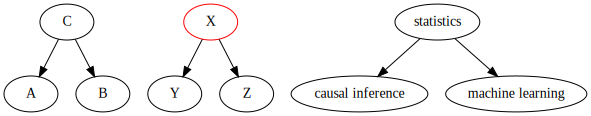

In [4]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

통계에 대한 지식이 인과 추론과 기계 학습을 더 많이 알게 한다고 해보겠습니다. 만약 당신의 통계 지식수준을 모른다면, 당신이 인과 추론에 능하다는 것을 아는 것은 당신이 기계 학습에도 능하다는 사실을 더 가능성 있게 합니다. 당신의 통계 지식수준을 알지 못하더라도 인과 추론 지식으로 추론할 수 있기 때문입니다. 만약 당신이 인과 추론을 잘한다면, 아마도 당신은 통계 또한 잘하므로 기계학습도 잘할 가능성이 있습니다.

만약 통계 지식을 조건화 한다면 기계 학습에 대한 지식과 인과 추론에 대한 지식은 독립입니다. 당신의 통계 지식 수준은 기계학습 지식 수준을 추론하는 데 필요한 모든 정보를 제공합니다. 하지만 당신의 인과 추론 수준을 아는 것은 더 이상의 기계학습에 대한 정보를 제공하지 않을 것입니다.

일반적으로 공통 원인을 공유하는 두 변수는 종속이지만 공통 원인을 조건화 하면 독립입니다. 또한,

$A \not \perp  B$

이고,

$
A \perp B | C
$

입니다.

유일하게 빠진 구조는 `collider`입니다. `collider`는 두 개의 화살표가 단일 변수에서 충돌하는 것입니다. 이는 두 변수가 공통 효과를 공유함을 의미합니다.

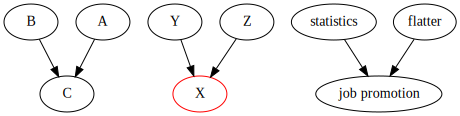

In [5]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

승진에 두 가지 방법이 있다고 해봅시다. 당신은 통계를 잘하거나 아부를 잘할 수 있습니다. 만약 당신의 승진을 조건화 하지 않으면, 승진 여부에 대해서는 아무것도 모릅니다. 이 경우 통계와 아첨은 독립입니다. 다시 말해 통계를 잘하는지 아는 것은 아첨을 잘하는지에 대해 아무것도 말해주지 않습니다. 반면 당신이 승진했다면, 당신의 통계 수준을 아는 것이 아첨 수준에 대한 정보를 줍니다. 만약 당신이 통계 지식은 없지만 승진했다면, 당신은 아첨꾼입니다. 그렇지 않았다면 승진할 수 없을 거예요. 반대로 아첨을 잘 못하는 사람이라면 통계 전문가임이 틀림없습니다. 이 현상을 **설명하기**라고 부르기도 하는데, 한 원인이 이미 효과를 설명하고 있어 다른 원인의 가능성을 낮추기 때문입니다.

일반적으로 `collider`를 조건화하면 종속 경로가 열립니다. 조건화하지 않으면 닫힙니다. 또는,

$A \perp B$

이며,

$
A \not \perp B | C
$

입니다.

세 가지 구조를 알면 훨씬 일반적인 규칙을 도출할 수 있습니다. 경로는 다음과 같은 경우에만 차단됩니다.
1. 조건화된 `non collider`가 포함되어 있음
2. 조건화되지 않은 `collider`를 포함하며 조건화된 하위 항목이 없음

여기 그래프에서 의존성이 어떻게 흐르는지에 대한 치트시트가 있습니다. Mark Paskin의 [Stanford presentation](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf)를 인용했습니다. 끝에 선이 있는 화살표는 독립성을 나타내고, 끝에 선이 없는 화살표는 의존성을 나타냅니다.

![img](data/img/graph-flow.png)

마지막 예로 아래 인과 그래프에서 독립성과 종속성 관계를 파악해 보세요.

1. Is $D \perp C$?
2. Is $D \perp C| A $ ?
3. Is $D \perp C| G $ ?
4. Is $A \perp F $ ?
5. Is $A \perp F|E $ ?
6. Is $A \perp F|E,C $ ?

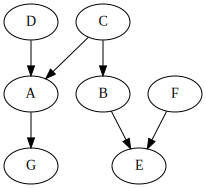

In [6]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**Answers**:
1. $D \perp C$. **조건화되지 않은** `collider`를 포함함
2. $D \not\perp C| A $. 조건화된 `collider`를 포함함
3. $D \not\perp C| G $. 조건화된 `collider`의 하위 항목을 포함함. G는 A의 대신으로 볼 수 있습니다.
4. $A \perp F $. 조건화되지 않은 `collider` B->E<-F를 포함함 
5. $A \not\perp F|E $. 조건화된 `collider`를  B->E<-F를 포함함
6. $A \perp F|E, C $. 조건화되지 않은 `collider` B->E<-F를 포함하지만, 조건화된 `non collider`를 포함함. E를 조건화하면 경로가 열리지만, C를 조건화하면 경로가 다시 닫힙니다.

인과 그래픽 모델을 알면 인과 추론에서 발생하는 문제를 이해할 수 있습니다. 문제는 항상 편향으로 귀결됩니다.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

그래픽 모델로 편향과 이를 위해 필요한 도구가 무엇인지 진단할 수 있습니다.

## Confounding Bias

![img](./data/img/causal-graph/both_crap.png)

편향의 첫 번째 원인은 `confounding`(교란)입니다. `confounding`은 `treatment`와 `outcome`이 공통 원인을 공유할 때 발생합니다. 예를 들어 `treatment`는 교육이고 `outcome`은 임금이라 해봅시다. 교육이 임금에 미치는 인과관계를 알기란 어렵습니다. 왜냐하면, 공통 원인인 지능을 공유하기 때문입니다. 따라서 더 많은 교육을 받은 사람들은 교육 때문이 아니라 단지 더 똑똑하기 때문에 돈을 많이 번다고 주장할 수 있습니다. `treatment`와 `outcome` 사이의 모든 `backdoor path`를 닫아 인과관계를 파악해야 합니다. 그러면 유일하게 남는 효과는 직접적인 효과인 `T`->`Y`뿐입니다. 만약 지능을 통제하여 지능 수준은 같지만, 교육 수준은 다른 사람들을 비교한다면, `outcome` 차이는 교육에 의한 차이일 것입니다. 지능은 모든 사람이 같기 때문입니다. `confounding bias`를 수정하려면 `treatment`와 `outcome`을 유발하는 모든 원인을 제어해야 합니다.

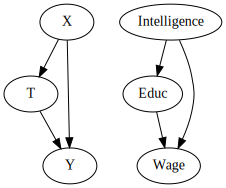

In [7]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

안타깝게도 모든 원인을 제어할 수는 없습니다. 우리가 측정할 수 없는 알려지지 않은 원인이 있을 수 있고 알려졌지만 제어할 수 없는 원인이 있습니다. 지능은 후자입니다. 많은 노력에도 과학자들은 아직 지능을 제대로 측정하는 알아내지 못했습니다. 저는 측정되지 않은 변수를 `U`로 표기합니다. 잠시 동안 지능은 교육에 직접적인 영향을 미칠 수 없다고 가정해 봅시다. 지능은 SAT를 얼마나 잘 볼지 영향을 주며, SAT 점수는 좋은 대학으로 가능성을 열어주기 때문에 여러분의 교육 수준을 결정합니다. 측정할 수 없는 지능을 제어할 수 없지만, SAT 점수를 제어하여 `backdoor path`를 닫을 수 있습니다.

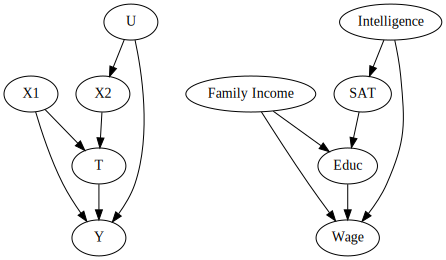

In [8]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

아래 그래프에서 `X1`과 `X2`, 즉, SAT 점수와 가족 소득에 대한 조건화는 `treatment`와 `outcome` 사이의 모든 `backdoor path`를 닫기 충분합니다. 따라서 $(Y_0, Y_1) \perp T | X1, X2$입니다. 모든 원인을 측정할 수는 없지만, 측정되지 않은 원인이 `treatment`에 미치는 영향을 매개하는 측정 가능한 변수를 제어한다면, 여전히 조건부 독립성을 얻을 수 있습니다. 간단한 참고 사항으로 $(Y_0, Y_1) \perp T | X1, U$ 이지만 `U`를 측정할 수 없으므로 조건을 붙일 수 없습니다.

측정되지 않은 변수가 `treatment`와 `outcome`을 직접 유발한다면 어떨까요? 다음 예에서 지능은 교육과 수입을 유발합니다. 따라서 `treatment`인 교육(Educ)과 `outcome`인 임금(Wage) 사이의 관계에는 `confounding`이 있습니다. 이 경우 `confounding`은 측정할 수 없어 제어할 수 없습니다. 그러나 `confounding` 변수를 대체할 수 있는 다른 측정 변수가 있습니다. 이 변수는 `backdoor path`에는 없지만, 이를 제어하는 것이 편향을 낮추는 데 도움이 됩니다. (그러나 편향을 완전히 제거하지는 못합니다.) 이를 `surrogate confounders`(대리 교란 변수)라 합니다.

지능을 측정할 수 없지만 대신 아버지와 어머니의 교육 수준과 같은 지능의 원인 및 IQ, SAT 점수를 측정할 수 있습니다. 이러한 `surrogate confounders`를 제어하는 것은 편향을 제거하기에 충분하지 않지만 도움이 됩니다.

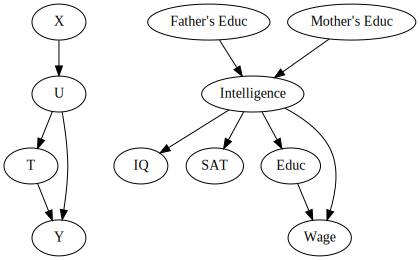

In [9]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## Selection Bias

`confounding bias`가 없도록 측정할 수 있는 모든 요인을 모델에 넣는 것이 좋다고 생각할 수 있습니다. 음... 다시 생각해 봅시다.

![image.png](./data/img/causal-graph/selection_bias.png)

두 번째 중요한 편향은 `selection bias`(선택 편향)입니다. confounding bias 와 비교하여 설명하겠습니다. confounding bias가 공통 **원인**을 제어하지 않을때 발생된다면, selection bias는 **결과**의 제어와 관련이 있습니다. 한 가지 주의할 점은 경제학자들은 모든 종류의 편향을 `selection bias`라 부르는 경향이 있다는 것입니다.

`selection bias`는 필요한 것보다 더 많은 변수를 통제할 때 발생합니다. 아래 graph에서 'treatment'와 'potential outcome'이 독립(Marginal Independence)이지만, collider를 조건부화하게되면 종속 관계로 바뀝니다.

통계 신의 도움으로 교육이 임금에 미치는 영향을 측정하기 위해 무작위화가 가능하다고 상상해보세요. `confounding`을 확인하기 위해 매우 많은 변수를 제어합니다. 먼저 당신은 투자를 통제합니다. 하지만 투자는 교육과 임금의 원인이 아니며 둘 사이의 결과입니다. 더 많은 교육을 받은 사람들은 더 많이 벌고 더 많이 투자합니다. 또한, 더 많이 버는 사람들은 더 많이 투자합니다. 투자는 `collider`이므로 조건화하면 당신은 `treatment`와 `outcome` 사이에 두 번째 길을 열게 되고 이는 직접적인 효과를 측정하기 어렵게 만듭니다. 문제를 해결하는 방법은 투자를 통제하여 투자가 동일한 인구의 작은 그룹을 보고, 해당 그룹의 교육 효과를 찾는 것입니다. 하지만 이렇게 하면 임금이 원래만큼 많이 변하는 것을 억제합니다.따라서 교육이 임금을 어떻게 바꾸는지 볼 수 없습니다. 임금이 변해야 하는 만큼 변하는 것을 허용하지 않기 때문입니다.

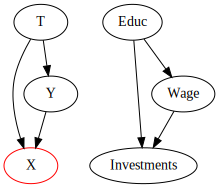

In [10]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

투자와 교육을 설명하는데 두 종류 값만 필요하다고 생각해봅시다. 투자 여부와 무관하게 그들은 교육을 받았거나 받지 않았습니다. 투자를 통제하지 않는다면 교육이 무작위화되었기 때문에 편향 0입니다. $E[Y_0|T=1] - E[Y_0|T=0] = 0$. 이는 교육을 받지 않은 사람이 받을 수 있는 임금 $Way_0$은 교육 여부와 상관없이 같음을 의미합니다. 하지만 투자를 조건화한다면 어떻게 될까요?

투자하는 사람 중에는 $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$인 경우가 있을 것입니다. 즉, 투자하는 사람 중 교육을 받지 않은 사람들은 높은 수익과 교육이 더 독립입니다. 비슷한 이유로 $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$ 입니다. 교육을 받고도 투자를 하지 않는 사람들은 교육도 안 받고 투자도 안 한 사람들보다 더 낮은 임금을 받을 수 있습니다.

순수한 그래픽 모델의 주장을 사용한다면 누군가 투자했을 때 그들이 높은 교육을 받았다는 것을 아는 것은 두 번째 원인인 임금을 설명해줍니다. 투자에 따라 고등 교육은 낮은 임금과 관련이 있으며 우리는 부정적인 편향인 $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$을 가집니다.

참고로 우리가 논의한 모든 것은 공통 효과의 후손을 조건으로 했을 때 사실입니다.

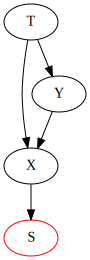

In [11]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

비슷한 일은 `treatment`의 `mediator`를 조건화할 때도 나타납니다. `mediator`는 `treatment`와 `outcome` 사이의 변수입니다. `mediator`는 인과 효과를 매개합니다. 교육을 무작위화 할 수 있다고 가정해봅시다. 추가로 당신은 어떤 사람이 사무직인지 아닌지 통제하기로 했습니다. 이러한 조건부는 인과 효과 추정을 편향시킵니다. `collider`가 `treatment`를 작동시키는 채널 중 하나를 닫기 때문입니다. 사무직 일자리를 얻는 것은 더 많은 교육이 더 높은 임금으로 이어지는 한 가지 방법입니다. 사무직 여부를 통제하면 교육이 임금에 미치는 직접적인 영향만을 열어 둡니다.

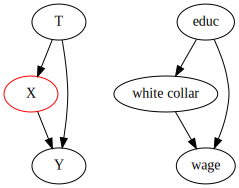

In [12]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

`potential outcome`에 인자를 제공하기 위해서 무작위로 인한 $E[Y_0|T=0] - E[Y_0|T=1] = 0$를 알고 있습니다. 하지만 사무직 조건하에서 $E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$입니다. 교육을 받지 않고도 사무직 직업을 얻는 사람들은 같은 직업을 가지려고 교육의 도움이 필요한 사람들보다 더 열심히 일하기 때문입니다. 같은 이유로 $E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]$ 인데, 교육을 받았음에도 사무직 직업을 얻지 못한 사람들은 교육을 받지 않은 사람들보다 덜 열심히 일할 수 있기 때문입니다.

예시에서 `mediator`에 조건화는 부정적인 편향을 유도합니다. 이는 교육의 효과를 실제보다 낮게 보이게 합니다. 인과 관계가 긍정적이기 때문입니다. 인과 효과가 부정적이면 `mediator`를 조건으로 하는 것은 긍정적인 편향을 가질 것입니다. 모든 경우에서 이러한 종류의 조건화는 효과를 실제보다 약하게 보이게 합니다.

당신이 두 명의 지원자 중 한 명을 선택해야 한다고 가정해보세요. 둘 다 인상적인 경력을 가지고 있지만, 한 명은 좋은 학위가 없습니다. 누구를 선택해야 할까요? 학위가 없는 후보는 성과가 같지만, 그에게 불리했을 가능성이 있었으므로 그를 선택해야 합니다. (일을 더 열심히 했을 가능성이 있습니다.)

![image.png](./data/img/causal-graph/three_bias.png)

## Key Ideas

인과관계 개념을 더 잘 이해하고 표현하기 위한 언어로서의 그래픽 모델을 살펴봤습니다. 조건부 독립성의 규칙을 그래프로 간단히 요약해 보았습니다. 그래픽 모델은 편향으로 이어질 수 있는 세 가지 구조를 탐구하는 데 도움이 되었습니다.

첫번째는 `confounding`입니다. `treatment`와 `outcome`이 설명할 수 없거나 통제할 수 없는 공통 원인을 가질 때 발생합니다. 두 번째는 공통 효과의 조건화로 인한 `selection bias`입니다. 세 번째는 `selection bias`의 한 형태로 매개 변수의 과도한 제어로 발생합니다. 과도한 제어는 `treatment`가 무작위로 할당된 경우에도 편향을 만들 수 있습니다. `selection bias`는 아무것도 하지 않을 때 해결될 수 있으므로 주의해야 합니다. 우리는 더 많이 하는 것을 미덕으로 여겨 변수를 통제할 때 똑똑하다고 생각하는 경향이 있습니다.

## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. Its goal is to be accessible monetarily and intellectually. It uses only free software based on Python.
If you found this book valuable and want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits, or giving feedback on passages you didn't understand. Go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it helpful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).